In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Lambda
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.decomposition import PCA

In [3]:
corpus = [
    'The speed of transmission is an important point of difference between the two viruses.'
    'Influenza has a shorter median incubation period (the time from infection to appearance of symptoms) and a shorter serial interval (the time between successive cases) than COVID-19 virus.'
    'The serial interval for COVID-19 virus is estimated to be 5-6 days, while for influenza virus, the serial interval is 3 days.'
    'This means that influenza can spread faster than COVID-19.'
]

In [5]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
sequences = tokenizer.texts_to_sequences(corpus)
print(sequences)

[[1, 18, 2, 19, 3, 20, 21, 22, 2, 23, 10, 1, 24, 25, 4, 26, 11, 12, 27, 28, 29, 1, 13, 30, 31, 14, 32, 2, 33, 34, 11, 12, 5, 6, 1, 13, 10, 35, 36, 15, 7, 8, 9, 1, 5, 6, 16, 7, 8, 9, 3, 37, 14, 38, 39, 40, 17, 41, 16, 4, 9, 1, 5, 6, 3, 42, 17, 43, 44, 45, 4, 46, 47, 48, 15, 7, 8]]


In [7]:
from tensorflow.keras.utils import to_categorical

vocab_size = len(tokenizer.word_index) + 1
emb = 10
win = 3

contexts = []
targets = []

for seq in sequences:
    for i in range(win, len(seq) - win):
        context = seq[i-win:i] + seq[i+1:i+1+win]
        target = seq[i]
        contexts.append(context)
        targets.append(target)

X = np.array(contexts)
y = to_categorical(targets, vocab_size)

In [10]:
model = Sequential([
    Embedding(
        input_dim = vocab_size,
        output_dim = emb,
        input_length = 2 * win
    ),
    Lambda(lambda x: tf.reduce_mean(x, axis = 1)),
    Dense(units = vocab_size, activation = "softmax")
])

In [11]:
model.compile(optimizer = Adam(), loss = "categorical_crossentropy", metrics = ['accuracy'])

In [12]:
model.predict(X[:1])

1/1 [==============================] - 1s 573ms/step


array([[0.02034041, 0.02060536, 0.02034662, 0.02052658, 0.02022706,
        0.02044393, 0.02056716, 0.02025086, 0.02052997, 0.02048959,
        0.02063246, 0.02050627, 0.02029968, 0.02038212, 0.0203653 ,
        0.02044451, 0.02063713, 0.02037903, 0.02022947, 0.02038067,
        0.0201647 , 0.02035381, 0.02051797, 0.02044806, 0.02016681,
        0.02037264, 0.02050074, 0.02044645, 0.0205232 , 0.02039721,
        0.02018755, 0.02032321, 0.02025853, 0.02038411, 0.02059725,
        0.02040232, 0.02041859, 0.02041219, 0.02038194, 0.02050105,
        0.02031107, 0.02054773, 0.02050045, 0.02037225, 0.02032399,
        0.02043861, 0.02037579, 0.02050369, 0.02028388]], dtype=float32)

In [13]:
model.fit(X, y, epochs=10)

Epoch 1/10
3/3 [==============================] - 4s 24ms/step - loss: 3.8920 - accuracy: 0.0141
Epoch 2/10
3/3 [==============================] - 0s 12ms/step - loss: 3.8898 - accuracy: 0.0282
Epoch 3/10
3/3 [==============================] - 0s 15ms/step - loss: 3.8882 - accuracy: 0.0563
Epoch 4/10
3/3 [==============================] - 0s 8ms/step - loss: 3.8868 - accuracy: 0.0845
Epoch 5/10
3/3 [==============================] - 0s 10ms/step - loss: 3.8853 - accuracy: 0.0845
Epoch 6/10
3/3 [==============================] - 0s 23ms/step - loss: 3.8839 - accuracy: 0.0845
Epoch 7/10
3/3 [==============================] - 0s 8ms/step - loss: 3.8823 - accuracy: 0.0986
Epoch 8/10
3/3 [==============================] - 0s 14ms/step - loss: 3.8810 - accuracy: 0.0845
Epoch 9/10
3/3 [==============================] - 0s 8ms/step - loss: 3.8795 - accuracy: 0.0845
Epoch 10/10
3/3 [==============================] - 0s 18ms/step - loss: 3.8781 - accuracy: 0.0845


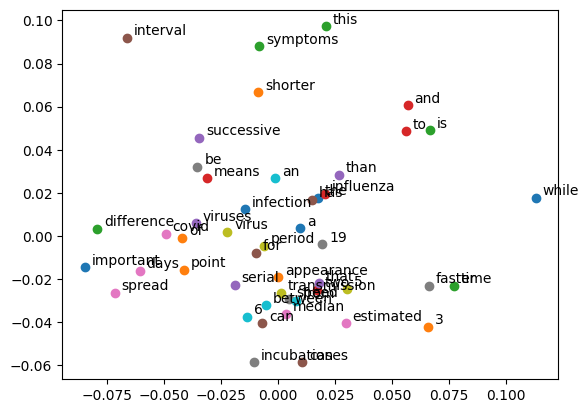

In [15]:
embeddings = model.get_weights()[0]

import matplotlib.pyplot as plt
pca = PCA(n_components=2)
redem = pca.fit_transform(embeddings)

for i,word in enumerate(tokenizer.word_index.keys()):
    x,y = redem[i]
    plt.scatter(x,y)
    plt.annotate(word, xy=(x,y), xytext=(5,2), textcoords="offset points")

plt.show()